In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, qiskit
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import DensityMatrix

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
def execute_circuit_sv(quantum_circuit):
    statevector_simulator=Aer.get_backend('statevector_simulator')
    result=qiskit.execute(quantum_circuit,statevector_simulator).result()
    statevector_results=result.get_statevector(quantum_circuit)
    circuit_diagram=quantum_circuit.draw()
    q_sphere=plot_state_qsphere(statevector_results)
    return statevector_results, circuit_diagram, q_sphere

In [3]:
qc=QuantumCircuit(1)
qc.z(0)
result, img, qsphere = execute_circuit_sv(qc)
print(result)

Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))


In [4]:
result

Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))


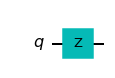

In [5]:
img

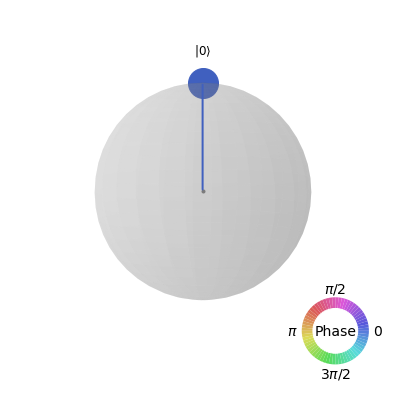

In [6]:
qsphere

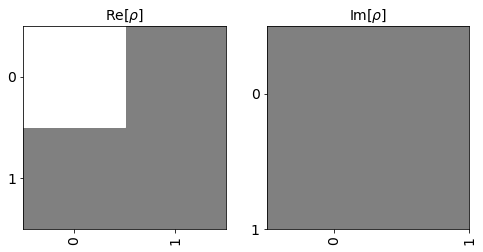

In [7]:
result.draw('hinton')

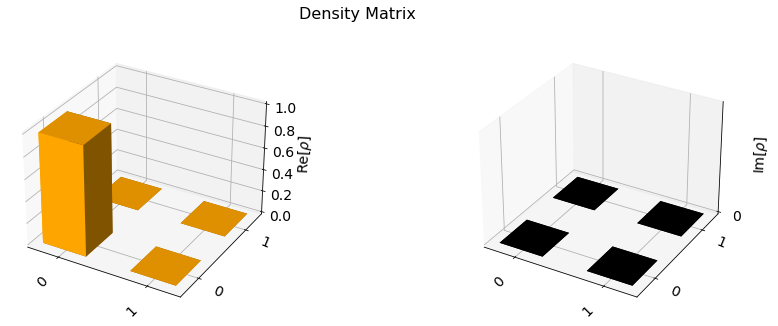

In [8]:
plot_state_city(result,title='Density Matrix',color=['orange','black'])

In [9]:
result.draw('latex')

<IPython.core.display.Latex object>

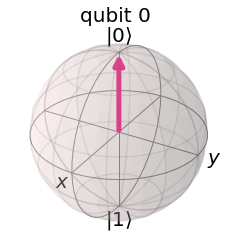

In [10]:
result.draw('bloch')

In [11]:
print(state_fidelity(result,result))

1.0


In [12]:
DensityMatrix(result)

DensityMatrix([[1.+0.j, 0.-0.j],
               [0.+0.j, 0.+0.j]],
              dims=(2,))


Traceback (most recent call last):
  Input In [14] in <module>
    visualize_transition(qc, trace=True, saveas="3 z gate.mp4", fpg=30, spg=2)
  File /opt/conda/lib/python3.8/site-packages/qiskit/visualization/transition_visualization.py:346 in visualize_transition
    return HTML(ani.to_jshtml())
  File /opt/conda/lib/python3.8/site-packages/matplotlib/animation.py:1333 in to_jshtml
    self.save(str(path), writer=writer)
  File /opt/conda/lib/python3.8/site-packages/matplotlib/animation.py:1091 in save
    anim._draw_next_frame(d, blit=False)
  File /opt/conda/lib/python3.8/site-packages/matplotlib/animation.py:1126 in _draw_next_frame
    self._draw_frame(framedata)
  File /opt/conda/lib/python3.8/site-packages/matplotlib/animation.py:1720 in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File /opt/conda/lib/python3.8/site-packages/qiskit/visualization/transition_visualization.py:322 in animate
    sphere.make_sphere()
  File /opt/conda/lib/python3.8/site-

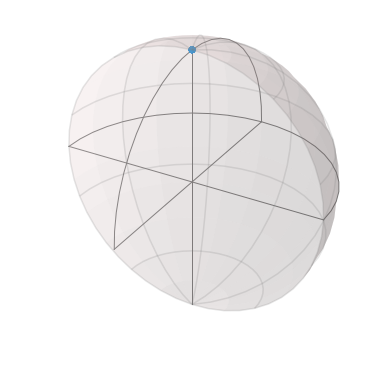

In [14]:
from qiskit.visualization import visualize_transition
from qiskit.visualization import *
from qiskit.visualization.bloch import Bloch
from qiskit.visualization.exceptions import VisualizationError
visualize_transition(qc, trace=True, saveas="3 z gate.mp4", fpg=30, spg=2)